In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm

**Read data**

In [2]:
listings_file_path = 'data/airbnb/listings.csv'
al_file_path = 'data/Alojamento_Local.csv'
df_al = pd.read_csv(al_file_path)
df_listings = pd.read_csv(listings_file_path)
df_listings.head()

C:\Users\joao_\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6499,https://www.airbnb.com/rooms/6499,2.020010e+13,1/28/2020,Belém 1 Bedroom Historical Apartment,"This apartment is all about Location, next to ...",Fully furnished apartment (35m2). Small inside...,"This apartment is all about Location, next to ...",none,"To get to the city center, tram 15 stops in f...",...,t,f,moderate,f,f,1,1,0,0,0.39
1,25659,https://www.airbnb.com/rooms/25659,2.020010e+13,1/28/2020,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",Sunny 1 Bedroom cozy apartment in historic Alf...,"Charming, sunny, cozy apartment in the heart o...",Sunny 1 Bedroom cozy apartment in historic Alf...,none,Alfama is the oldest and most picturesque quar...,...,t,f,moderate,f,f,1,1,0,0,1.61
2,28066,https://www.airbnb.com/rooms/28066,2.020010e+13,1/29/2020,ear the birds,NaN,traditional farm house in a quiet place where ...,traditional farm house in a quiet place where ...,none,NaN,...,f,f,flexible,f,f,1,0,1,0,NaN
3,29138,https://www.airbnb.com/rooms/29138,2.020010e+13,1/28/2020,Room for rent in shared house,NaN,"05 minutes from city center by subway, 10 minu...","05 minutes from city center by subway, 10 minu...",none,NaN,...,f,f,flexible,f,f,1,0,1,0,NaN
4,29248,https://www.airbnb.com/rooms/29248,2.020010e+13,1/28/2020,Apartamento Alfama com vista para o rio!,NaN,"Located in the city center, and great location...","Located in the city center, and great location...",none,NaN,...,t,f,moderate,f,f,1,1,0,0,2.89


In [3]:
def missing_data(df, columns):
    df_graph = df[columns]
    #missing data
    total = df_graph.isnull().sum().sort_values(ascending=False)
    percent = (df_graph.isnull().sum()/df_graph.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data)
    plt.figure(figsize=(10,5))
    ax = sns.barplot(x='index',y = 'Percent', data= missing_data.reset_index())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

def feature_dist(df, column_name):
    plt.figure(figsize=(15,4))
    sns.distplot(df[column_name] , fit=norm)

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(df[column_name])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title('{} distribution'.format(column_name))
    plt.show()

**missing values**

                             Total   Percent
square_feet                  24601  0.983961
review_scores_value           4084  0.163347
review_scores_checkin         4084  0.163347
review_scores_location        4082  0.163267
review_scores_communication   4079  0.163147
review_scores_accuracy        4078  0.163107
review_scores_cleanliness     4073  0.162907
review_scores_rating          4067  0.162667
license                       3480  0.139189
beds                           111  0.004440
bathrooms                       29  0.001160
bedrooms                        10  0.000400
amenities                        0  0.000000
room_type                        0  0.000000
accommodates                     0  0.000000
bed_type                         0  0.000000
property_type                    0  0.000000


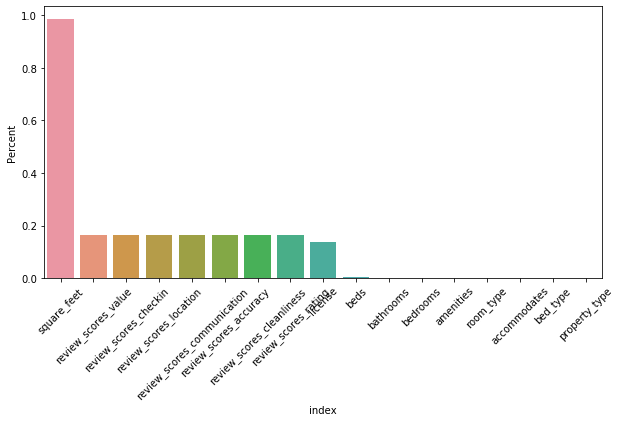

In [4]:
#columns = ['bedrooms','bathrooms']
#df_listings[columns]
columns = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'license',
    'property_type',
    'room_type',
    'accommodates',
    'bathrooms',
    'bedrooms',
    'beds',
    'bed_type',
    'amenities',
    'square_feet'
]
missing_data(df_listings,columns)

**room type**

In [5]:
print(df_listings['room_type'].value_counts())

Entire home/apt    18219
Private room        5734
Hotel room           634
Shared room          415
Name: room_type, dtype: int64


**accommodates**

2     7312
4     7098
6     3282
3     2251
5     1531
1     1069
8      895
7      498
10     367
9      218
16     151
12     151
14      79
11      42
15      28
13      27
26       1
18       1
32       1
Name: accommodates, dtype: int64

 mu = 4.04 and sigma = 2.38



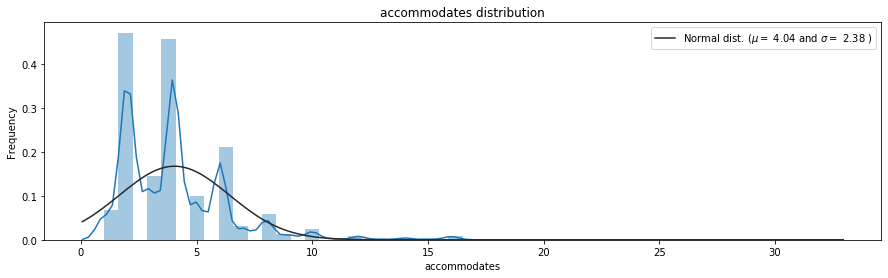

In [6]:
print(df_listings['accommodates'].value_counts())
feature_dist(df_listings[~df_listings['accommodates'].isnull()],'accommodates')

In [7]:
df_listings['accommodates2'] = pd.qcut(df_listings['accommodates'],10, duplicates='drop')
df_listings.accommodates2.value_counts()

(0.999, 2.0]    8381
(3.0, 4.0]      7098
(4.0, 6.0]      4813
(6.0, 32.0]     2459
(2.0, 3.0]      2251
Name: accommodates2, dtype: int64

**property type**

In [8]:
print(df_listings['property_type'].value_counts())

Apartment                 18655
House                      1941
Condominium                 612
Villa                       455
Serviced apartment          417
Guesthouse                  405
Hostel                      363
Bed and breakfast           323
Loft                        290
Boutique hotel              269
Townhouse                   224
Guest suite                 180
Cottage                     177
Camper/RV                   151
Boat                         85
Aparthotel                   83
Tiny house                   63
Hotel                        45
Chalet                       35
Castle                       30
Nature lodge                 30
Other                        29
Farm stay                    26
Bungalow                     23
Windmill                     19
Cabin                        12
Earth house                  12
Campsite                     11
Casa particular (Cuba)        8
Houseboat                     8
Hut                           6
Dome hou

**Bedrooms**

1.0      13343
2.0       6302
3.0       2677
0.0       1180
4.0        808
5.0        368
6.0        156
7.0         66
8.0         35
9.0         33
10.0        12
12.0         4
11.0         2
24.0         1
100.0        1
25.0         1
15.0         1
18.0         1
16.0         1
Name: bedrooms, dtype: int64

 mu = 1.66 and sigma = 1.33



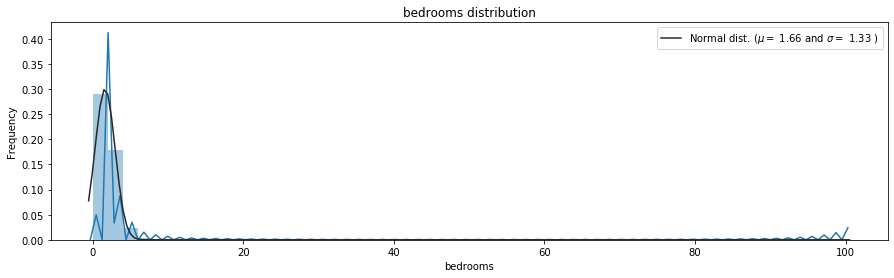

In [9]:
print(df_listings['bedrooms'].value_counts())
feature_dist(df_listings[~df_listings['bedrooms'].isnull()],'bedrooms')

In [10]:
df_listings[df_listings['bedrooms'] == 0]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,accommodates2
19,56906,https://www.airbnb.com/rooms/56906,2.020010e+13,1/28/2020,Lisbon Balcony Penthouse 15th Floor,"Hi, First of all thanks for looking my apartme...",THE APARTMENT -1 double bed to relax after a p...,"Hi, First of all thanks for looking my apartme...",none,NaN,...,f,moderate,f,f,8,8,0,0,1.27,"(0.999, 2.0]"
24,83700,https://www.airbnb.com/rooms/83700,2.020010e+13,1/29/2020,Studio Cascais- Panoramic sea view,Nice cosy studio with panoramic sea view and a...,"With a panoramic view of the sea, the Studio (...",Nice cosy studio with panoramic sea view and a...,none,"Residential, quiet and full of houses and gard...",...,f,strict_14_with_grace_period,f,f,1,1,0,0,1.36,"(3.0, 4.0]"
63,141883,https://www.airbnb.com/rooms/141883,2.020010e+13,1/28/2020,Gomes Freire Studio with Balcony,Studio with excellent localization in the hist...,Studio with excellent localization in the hist...,Studio with excellent localization in the hist...,none,NaN,...,f,strict_14_with_grace_period,f,f,64,64,0,0,0.25,"(0.999, 2.0]"
98,181219,https://www.airbnb.com/rooms/181219,2.020010e+13,1/28/2020,Golden Blue Studio,Cosy studio placed where Bairro Alto/São Bento...,The studio is placed in a ground floor of a re...,Cosy studio placed where Bairro Alto/São Bento...,none,"This attractive neighborhood (named ""Royal Pri...",...,f,strict_14_with_grace_period,f,f,1,1,0,0,2.04,"(0.999, 2.0]"
101,189676,https://www.airbnb.com/rooms/189676,2.020010e+13,1/28/2020,Santa Catarina - City / river views,NaN,The flat is located in the Bairro of Santa Cat...,The flat is located in the Bairro of Santa Cat...,none,NaN,...,f,strict_14_with_grace_period,f,f,3,3,0,0,2.26,"(0.999, 2.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24895,41709101,https://www.airbnb.com/rooms/41709101,2.020010e+13,1/28/2020,HOUZE_Central Studio in Alcântara,Spacious studio in a charming neighbourhood cl...,"Very spacious, newly renovated and fully furni...",Spacious studio in a charming neighbourhood cl...,none,Alcântara is a neighborhood has several old wa...,...,f,strict_14_with_grace_period,f,f,17,17,0,0,NaN,"(0.999, 2.0]"
24949,41783305,https://www.airbnb.com/rooms/41783305,2.020010e+13,1/28/2020,Mini Estudio c/ piscina no centro da Parede,O meu mini estudio tem todo o conforto e todos...,NaN,O meu mini estudio tem todo o conforto e todos...,none,Eu estou sempre por perto e posso ajudar sempr...,...,f,moderate,f,f,9,6,3,0,NaN,"(0.999, 2.0]"
24950,41783631,https://www.airbnb.com/rooms/41783631,2.020010e+13,1/28/2020,Estudio c/ Piscina centro da Parede S9,O meu T0 tem 12 m2 cama de casal e é totalment...,"É um estudio que pode ser para 1 ou 2 pessoas,...",O meu T0 tem 12 m2 cama de casal e é totalment...,none,"O bairro é bonito, tem lojas de tudo e superme...",...,f,moderate,f,f,9,6,3,0,NaN,"(0.999, 2.0]"
24954,41784976,https://www.airbnb.com/rooms/41784976,2.020010e+13,1/28/2020,Attic with Panoramic River Views,Nautical themed home with panoramic views of t...,Modern apartment with all amenities needed to ...,Nautical themed home with panoramic views of t...,none,"Take a stroll through Alfama, one of Lisbon’s ...",...,f,strict_14_with_grace_period,f,f,1,1,0,0,NaN,"(3.0, 4.0]"


In [11]:
df_listings['bedrooms2'] = pd.qcut(df_listings['bedrooms'],9, duplicates='drop')
df_listings.bedrooms2.value_counts()

(-0.001, 1.0]    14523
(1.0, 2.0]        6302
(2.0, 3.0]        2677
(3.0, 100.0]      1490
Name: bedrooms2, dtype: int64

**beds**

1.0      8556
2.0      6586
3.0      4295
4.0      2432
5.0      1077
6.0       675
0.0       317
7.0       280
8.0       248
9.0       107
10.0       99
12.0       49
11.0       46
16.0       28
14.0       24
13.0       21
15.0       12
18.0        7
17.0        4
30.0        3
22.0        3
20.0        3
19.0        2
27.0        2
24.0        2
25.0        2
26.0        2
21.0        2
23.0        2
100.0       1
28.0        1
35.0        1
50.0        1
38.0        1
Name: beds, dtype: int64

 mu = 2.53 and sigma = 2.16



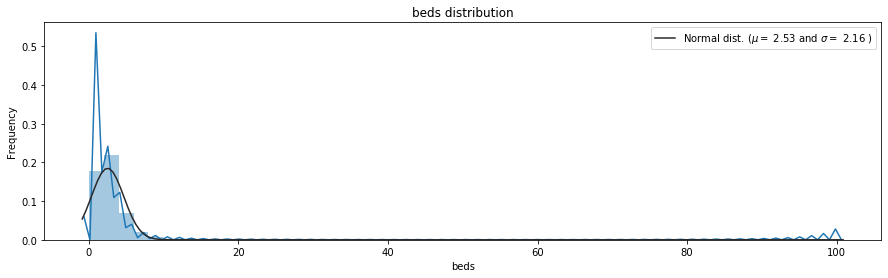

In [12]:
print(df_listings['beds'].value_counts())
feature_dist(df_listings[~df_listings['beds'].isnull()],'beds')

In [13]:
df_listings['beds2'] = pd.qcut(df_listings['beds'],9, duplicates='drop')
df_listings.beds2.value_counts()

(-0.001, 1.0]    8873
(1.0, 2.0]       6586
(2.0, 3.0]       4295
(4.0, 100.0]     2705
(3.0, 4.0]       2432
Name: beds2, dtype: int64

**bathrooms**

1.0     16751
2.0      4408
1.5      1179
3.0      1011
2.5       585
4.0       228
3.5       206
0.0       148
5.0       108
4.5        74
6.0        66
0.5        56
5.5        49
8.0        29
7.0        22
9.0        14
10.0       13
6.5        10
7.5         4
8.5         2
12.0        2
11.5        1
24.0        1
11.0        1
13.5        1
16.5        1
13.0        1
9.5         1
18.0        1
Name: bathrooms, dtype: int64

 mu = 1.44 and sigma = 0.91



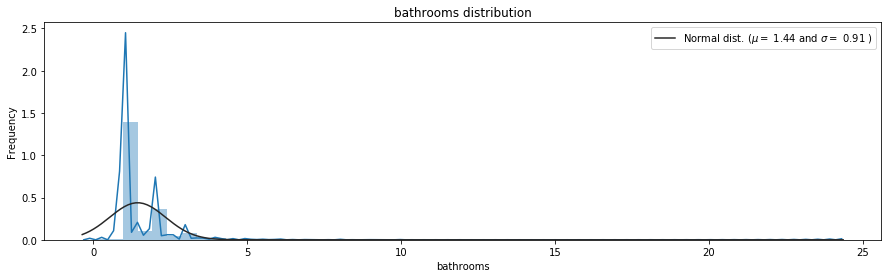

In [14]:
print(df_listings['bathrooms'].value_counts())
feature_dist(df_listings[~df_listings['bathrooms'].isnull()],'bathrooms')

In [15]:
len(df_listings[df_listings['bathrooms'] == 0])

148

In [16]:
df_listings['bathrooms2'] = pd.qcut(df_listings['bathrooms'],4, duplicates='drop')
df_listings.bathrooms2.value_counts()

(-0.001, 1.0]    16955
(1.0, 2.0]        5587
(2.0, 24.0]       2431
Name: bathrooms2, dtype: int64

**bed type**

In [17]:
print(df_listings['bed_type'].value_counts())

Real Bed         24866
Pull-out Sofa      111
Futon               15
Couch                6
Airbed               4
Name: bed_type, dtype: int64


**square feet**

0.0       135
538.0      25
431.0      16
861.0      15
1292.0     15
         ... 
829.0       1
678.0       1
90.0        1
970.0       1
23.0        1
Name: square_feet, Length: 73, dtype: int64

 mu = 627.15 and sigma = 1733.18



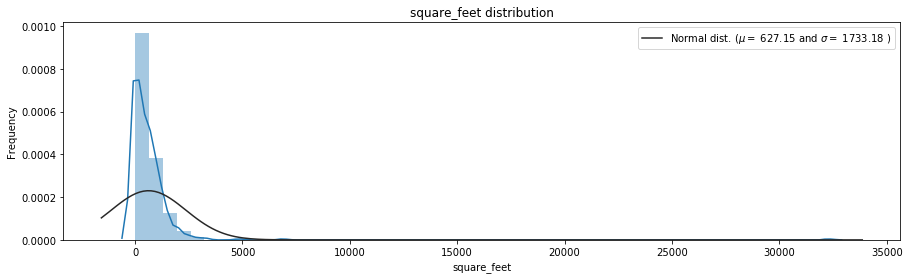

In [18]:
print(df_listings['square_feet'].value_counts())
feature_dist(df_listings[~df_listings['square_feet'].isnull()],'square_feet')

In [19]:
df_listings['square_feet2'] = pd.qcut(df_listings['square_feet'],4, duplicates='drop')
df_listings.square_feet2.value_counts()

(-0.001, 431.0]     213
(431.0, 861.0]      101
(861.0, 32292.0]     87
Name: square_feet2, dtype: int64

**license**

In [20]:
len(df_listings[df_listings['license'].isnull()])

3480

In [21]:
len(df_listings[df_listings['license'] == 'Exempt'])

1746

In [22]:
def intTryParse(value):
    try:
        a = int(value)
        return True
    except ValueError:
        return False

**Merge df_listings with alojamento_local.csv**

In [23]:
#get only listings where 'license' is not null && != 'Exempt'
df_listings_with_license = df_listings[(~df_listings['license'].isnull())&(df_listings['license'] != 'Exempt')]

#string replace
df_listings_with_license['NrRNAL'] = [s.replace('/AL','').replace('.','') for s in df_listings_with_license['license']]

#get only records where license nr can be converted to int 
df_listings_with_license = df_listings_with_license[[intTryParse(s) for s in df_listings_with_license['NrRNAL']]]

#convert NrRNAL to int before merge the two dataframes
df_listings_with_license['NrRNAL'] = df_listings_with_license['NrRNAL'].astype(int)

#inner join two dataframes
result = pd.merge(df_listings_with_license, df_al, how='inner', on='NrRNAL')
print(len(result))

C:\Users\joao_\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


17168
